In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sea
import re

import numpy as np
import pymysql
import time
import urllib
from bs4 import BeautifulSoup

colors = np.random.rand(50)

sea.set_style('dark')
# general graphics settings
matplotlib.rcParams['figure.figsize'] = (10, 7)

In [26]:
db = pymysql.connect(host="localhost", # your host, usually localhost
                     user="root", # your username
                      passwd="850718", # your password
                      db="oscar", use_unicode=True, charset="utf8") # name of the data base
cur = db.cursor()

In [27]:
m = 9900
cur.execute("SELECT * FROM top10000_detail LIMIT %s"%(m))
row1 =  cur.fetchall()
Runtime = []
Rating = []
Year = []
Votes = []
for row in row1:
    Runtime.append(row[3])
#rating
for row in row1:
	Rating.append(row[8])
#year
for row in row1:
	Year.append(row[5])
#votes
for row in row1:
	Votes.append(row[4])

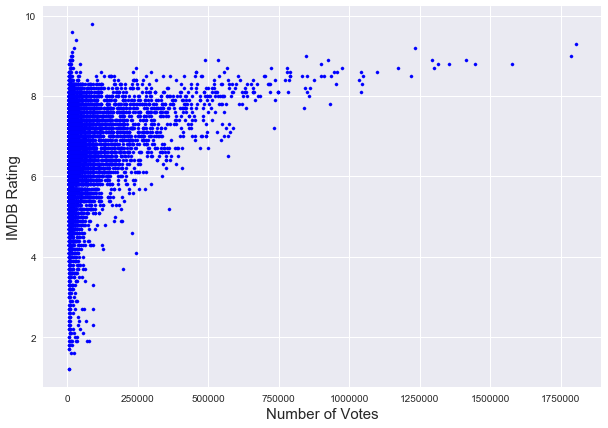

In [28]:
#rating vs votes
fig1 = plt.figure()
plt.xlabel('Number of Votes', fontsize=15)
plt.ylabel('IMDB Rating', fontsize=15)
plt.scatter(Votes, Rating, color='blue', s=10)
plt.grid()
plt.show()

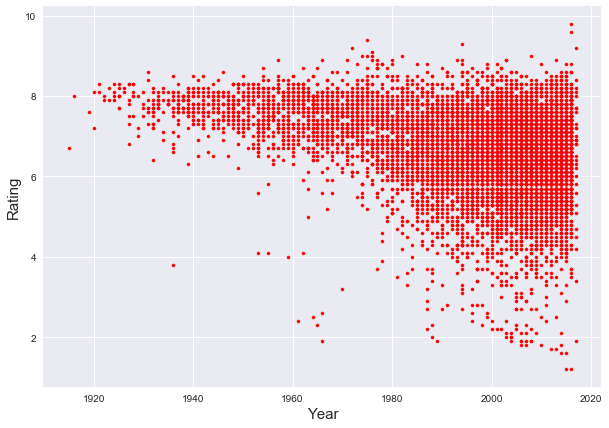

In [29]:
#rating vs year
fig2 = plt.figure()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Rating', fontsize=15)
plt.scatter(Year, Rating, color='red', s=10)
plt.grid(True)
plt.show()

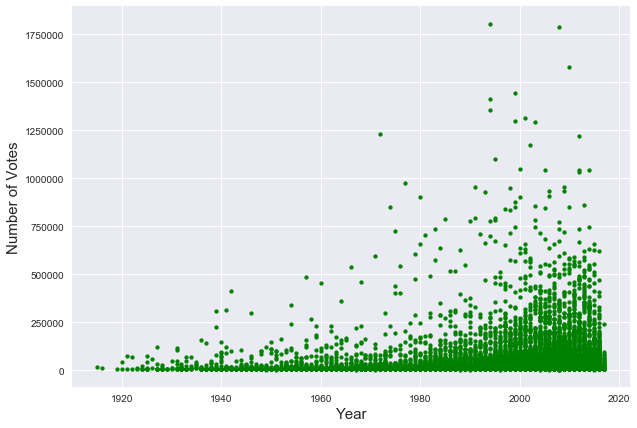

In [30]:
#votes vs year
fig3 = plt.figure()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Votes', fontsize=15)
plt.scatter(Year, Votes, color='Green', s=15)
plt.grid(True)
plt.show()

In [31]:
cur.execute("select year, count(year) as cnt from top10000_detail where year > '1950' group by year ")
row2 =  cur.fetchall()
release_year = []
release_year_num = []
#rating
for row in row2:
	release_year.append(row[0])
#year
for row in row2:
	release_year_num.append(row[1])

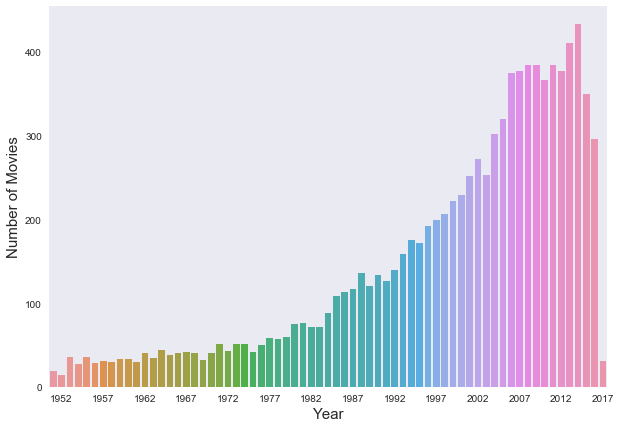

In [32]:
fig4 = plt.figure()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
g = sea.barplot(release_year,release_year_num)
for i, label in enumerate(g.get_xticklabels()):
    if i % 5 == 1:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


In [17]:
cur.execute("select rating, count(rating) as cnt from top10000_detail  group by rating ")
row3 =  cur.fetchall()
movie_rating = []
movie_rating_num = []
#rating
for row in row3:
	movie_rating.append(row[0])
#movie numbers
for row in row3:
	movie_rating_num.append(row[1])

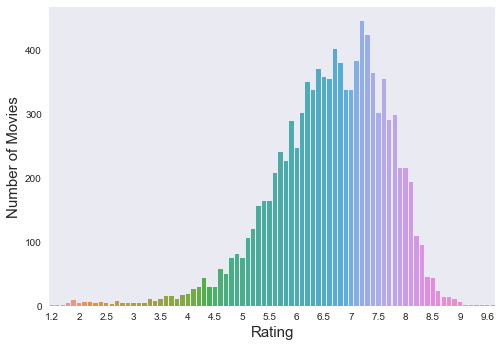

In [18]:
fig5 = plt.figure()
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
movie_rating = np.asarray(movie_rating)
movie_rating_num = np.asarray(movie_rating_num)

g_rating = sea.barplot(movie_rating, movie_rating_num)
for i, label in enumerate(g_rating.get_xticklabels()):
    if i % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [19]:
cur.execute("select genre, count(genre) as cnt from top10000_genre  group by genre order by cnt desc ")
row4 =  cur.fetchall()
movie_genre = []
movie_genre_num = []
#genre
for row in row4:
	movie_genre.append(row[0])
#count
for row in row4:
	movie_genre_num.append(int(row[1]))

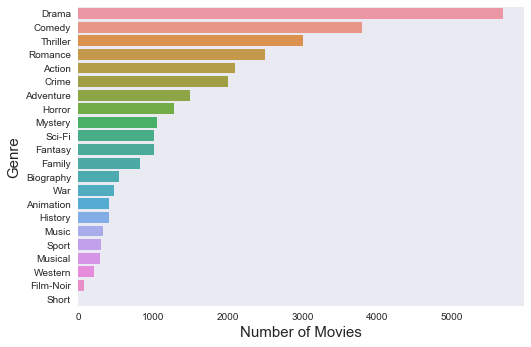

In [20]:
fig6 = plt.figure()
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Genre', fontsize=15)
movie_genre = np.asarray(movie_genre)
movie_genre_num = np.asarray(movie_genre_num)
movie_genre_num
g_genre = sea.barplot( movie_genre_num, movie_genre)
#for i, label in enumerate(g_genre.get_xticklabels()):
#    if i % 5 == 0:  # every 5th label is kept
#        label.set_visible(True)
#    else:
#        label.set_visible(False)

In [209]:
cur.execute("SELECT rating, runtime FROM top10000_detail WHERE runtime REGEXP '^[A-Za-z0-9]+$'")
row5 =  cur.fetchall()
movie_runtime_5 = []
movie_rating_5 = []
#genre
for row in row5:
	movie_rating_5.append(row[0])
#count
for row in row5:
	movie_runtime_5.append(int(row[1]))

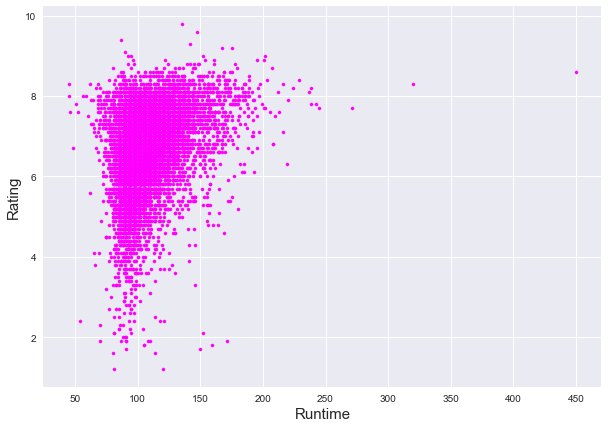

In [213]:
fig7 = plt.figure()
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Rating', fontsize=15)
movie_rating_5 = np.asarray(movie_rating_5)
movie_runtime_5 = np.asarray(movie_runtime_5)
plt.scatter(movie_runtime_5, movie_rating_5 , color='magenta', s=10)
plt.grid(True)
plt.show()

In [242]:
cur.execute("SELECT runtime, count(runtime) as cnt FROM top10000_detail_2 WHERE runtime REGEXP '^[A-Za-z0-9]+$' and runtime>0 group by runtime order by runtime")
row6 =  cur.fetchall()
movie_runtime_6 = []
movie_runtime_6_num = []
#genre
for row in row6:
	movie_runtime_6.append(row[0])
#count
for row in row6:
	movie_runtime_6_num.append(int(row[1]))

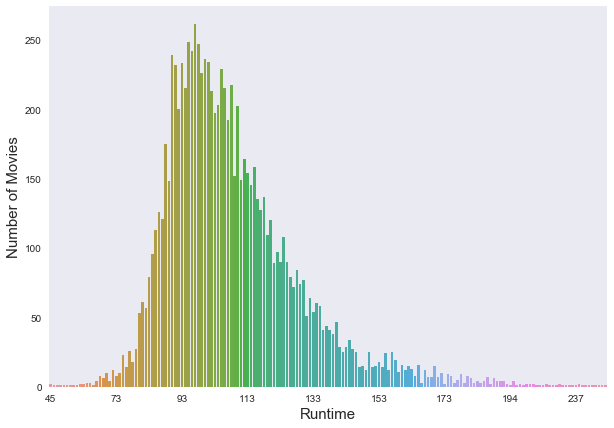

In [243]:
fig8 = plt.figure()
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
movie_runtime_6 = np.asarray(movie_runtime_6)
movie_runtime_6_num = np.asarray(movie_runtime_6_num)
g_runtime_num = sea.barplot( movie_runtime_6, movie_runtime_6_num)
for i, label in enumerate(g_runtime_num.get_xticklabels()):
    if i % 20 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [230]:
cur.execute("select distributor, count(distributor) as cnt from top10000_distributor  where distributor!=' ' and distributor!='The' group by distributor order by cnt desc limit 30 ")
row7 =  cur.fetchall()
movie_distributor = []
movie_distributor_num = []
#genre
for row in row7:
	movie_distributor.append(row[0])
#count
for row in row7:
	movie_distributor_num.append(int(row[1]))

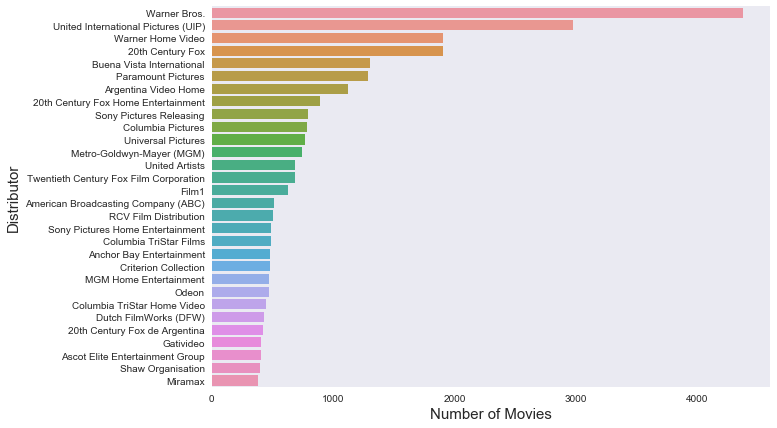

In [255]:
fig9 = plt.figure()
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Distributor', fontsize=15)
movie_distributor = np.asarray(movie_distributor)
movie_distributor_num = np.asarray(movie_distributor_num)
movie_distributor
g_distributor = sea.barplot( movie_distributor_num, movie_distributor)
#for i, label in enumerate(g_genre.get_xticklabels()):
#    if i % 5 == 0:  # every 5th label is kept
#        label.set_visible(True)
#    else:
#        label.set_visible(False)

In [35]:
cur.execute("select movieName, votes from top10000_detail limit 30")
row8 =  cur.fetchall()
movie_votes_name = []
movie_votes_num = []
#genre
for row in row8:
	movie_votes_name.append(row[0])
#count
for row in row8:
	movie_votes_num.append(int(row[1]))

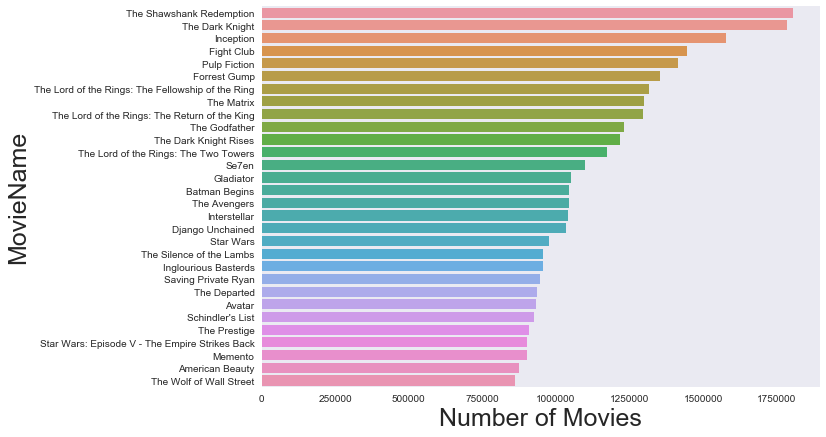

In [45]:
fig10 = plt.figure(figsize=(10, 7))
plt.xlabel('Number of Movies', fontsize=25)
plt.ylabel('MovieName', fontsize=25)
movie_votes_name = np.asarray(movie_votes_name)
movie_votes_num = np.asarray(movie_votes_num)
g_votes_num = sea.barplot(movie_votes_num, movie_votes_name)
plt.savefig('fig10.pdf', format='pdf')

In [18]:
cur.execute("select movieName, gross_world from top10000_detail_3  order by gross_world desc limit 30")
row9 =  cur.fetchall()
movie_gross_name = []
movie_gross_num = []
#genre
for row in row9:
	movie_gross_name.append(row[0])
#count
for row in row9:
	movie_gross_num.append(row[1])

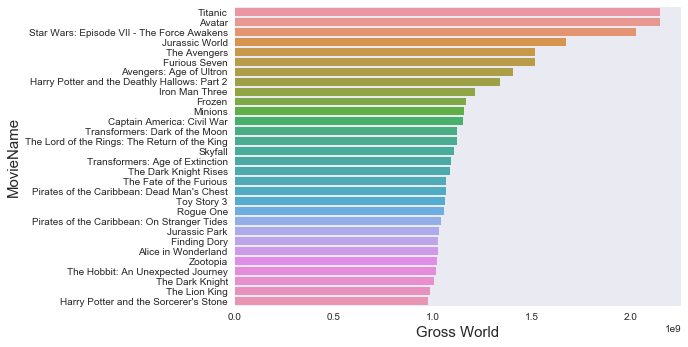

In [19]:
fig11 = plt.figure()
plt.xlabel('Gross World', fontsize=15)
plt.ylabel('MovieName', fontsize=15)
movie_gross_name = np.asarray(movie_gross_name)
movie_gross_num = np.asarray(movie_gross_num)
g_gross_num = sea.barplot(movie_gross_num, movie_gross_name)

In [20]:
cur.execute("select mpaa, count(mpaa) as cnt from top10000_detail  where mpaa!=' '  group by mpaa order by cnt  desc limit 4")
row10 =  cur.fetchall()
movie_mpaa = []
movie_mpaa_num = []
#genre
for row in row10:
	movie_mpaa.append(row[0])
#count
for row in row10:
	movie_mpaa_num.append(int(row[1]))

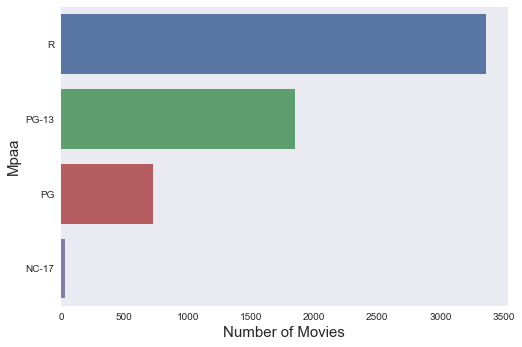

In [21]:
fig12 = plt.figure()
plt.xlabel('Number of Movies', fontsize=15)
plt.ylabel('Mpaa', fontsize=15)
movie_mpaa = np.asarray(movie_mpaa)
movie_mpaa_num = np.asarray(movie_mpaa_num)
g_mpaa_num = sea.barplot(movie_mpaa_num, movie_mpaa)